# pyMixtComp: Canadian Weather example

Unsupervised clustering with functional data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pyMixtComp import MixtComp
from pyMixtComp.data import load_canadian_weather
from pyMixtComp.utils import create_functional, convert_functional

In [2]:
plt.rcParams["figure.figsize"] = (10, 8)

## Data preparation

Import the Canadian Weather dataset included in the package. It contains the daily temperature and precipitation at 35 different locations in Canada averaged over 1960 to 1994.

In [3]:
data, model = load_canadian_weather()
data

,tempav,precav
0,"1:-3.6,2:-3.1,3:-3.4,4:-4.4,5:-2.9,6:-4.5,7:-5...","1:5.2,2:5.8,3:3.9,4:4.3,5:6.2,6:3.4,7:3.7,8:7...."
1,"1:-4.4,2:-4.2,3:-5.3,4:-5.4,5:-5.6,6:-7.1,7:-5...","1:6,2:5.3,3:2.6,4:5.3,5:6,6:2.1,7:7.4,8:4,9:3...."
2,"1:-3.8,2:-3.5,3:-4.6,4:-5,5:-4.1,6:-6.1,7:-5.5...","1:5.3,2:5.2,3:2.1,4:5,5:7.3,6:2.2,7:2.6,8:5.7,..."
3,"1:-1.4,2:-1.6,3:-2.5,4:-2.3,5:-2.4,6:-3.7,7:-2...","1:5.6,2:3.7,3:2.8,4:5.3,5:3.8,6:2.4,7:5.9,8:4...."
4,"1:-5.8,2:-5.6,3:-7.3,4:-7,5:-6.7,6:-8.9,7:-7.5...","1:4.6,2:4.4,3:2.3,4:4.8,5:5.1,6:1.5,7:3,8:5.2,..."
5,"1:-7.9,2:-7.5,3:-9.3,4:-8.7,5:-9.1,6:-10.9,7:-...","1:4,2:3.2,3:3.3,4:3.3,5:2.7,6:0.8,7:3.7,8:2.5,..."
6,"1:-22.5,2:-23,3:-23,4:-21.8,5:-23.5,6:-24.4,7:...","1:1.1,2:1.3,3:1.2,4:1.3,5:1,6:1.3,7:1,8:2.3,9:..."
7,"1:-14.1,2:-14.4,3:-15,4:-14.3,5:-16.2,6:-16.3,...","1:2.6,2:1.2,3:2.1,4:2.3,5:1.7,6:2,7:2.2,8:1.7,..."
8,"1:-14.6,2:-14.7,3:-15.5,4:-14.3,5:-15.8,6:-16....","1:3,2:1.8,3:1.3,4:2.5,5:2.1,6:1.6,7:2.1,8:1.5,..."
9,"1:-10.8,2:-11.4,3:-12.5,4:-11.2,5:-12,6:-13.2,...","1:4.1,2:2.3,3:2.6,4:4.3,5:2.3,6:1.5,7:3.3,8:3,..."


The dataset is already in the right format. Otherwise, you can use `create_functional` to create a functional data from a time vector and a value vector. `convert_functional` allows to perform the inverse transformation.

In [4]:
time_array, value_array = convert_functional(data.iloc[0, 0])
print(time_array[:10])
print(value_array[:10])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[-3.6 -3.1 -3.4 -4.4 -2.9 -4.5 -5.5 -3.1 -4.  -5. ]


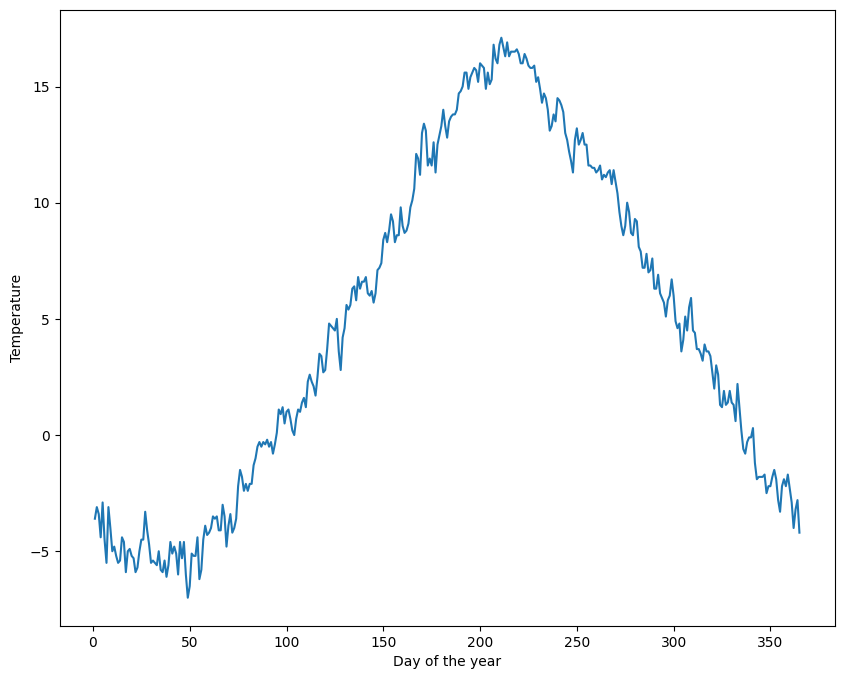

In [5]:
sns.lineplot(x=time_array, y=value_array)
plt.xlabel("Day of the year")
plt.ylabel("Temperature")
plt.show()

In [6]:
func = create_functional(time_array, value_array)
func

'1.0:-3.6,2.0:-3.1,3.0:-3.4,4.0:-4.4,5.0:-2.9,6.0:-4.5,7.0:-5.5,8.0:-3.1,9.0:-4.0,10.0:-5.0,11.0:-4.8,12.0:-5.2,13.0:-5.5,14.0:-5.4,15.0:-4.4,16.0:-4.6,17.0:-5.9,18.0:-5.0,19.0:-4.9,20.0:-5.2,21.0:-5.3,22.0:-5.9,23.0:-5.7,24.0:-5.0,25.0:-4.5,26.0:-4.5,27.0:-3.3,28.0:-4.1,29.0:-4.7,30.0:-5.5,31.0:-5.4,32.0:-5.5,33.0:-5.6,34.0:-5.0,35.0:-5.8,36.0:-5.9,37.0:-5.4,38.0:-6.1,39.0:-5.6,40.0:-4.6,41.0:-5.1,42.0:-4.8,43.0:-5.1,44.0:-6.0,45.0:-4.6,46.0:-5.3,47.0:-4.6,48.0:-6.0,49.0:-7.0,50.0:-6.5,51.0:-5.1,52.0:-5.2,53.0:-5.2,54.0:-4.4,55.0:-6.2,56.0:-5.8,57.0:-4.5,58.0:-3.9,59.0:-4.3,60.0:-4.2,61.0:-4.0,62.0:-3.5,63.0:-3.6,64.0:-3.5,65.0:-4.1,66.0:-4.1,67.0:-3.0,68.0:-3.5,69.0:-4.8,70.0:-3.9,71.0:-3.4,72.0:-4.2,73.0:-4.0,74.0:-3.6,75.0:-2.2,76.0:-1.5,77.0:-1.8,78.0:-2.4,79.0:-2.1,80.0:-2.4,81.0:-2.1,82.0:-2.1,83.0:-1.3,84.0:-1.0,85.0:-0.5,86.0:-0.3,87.0:-0.5,88.0:-0.3,89.0:-0.4,90.0:-0.2,91.0:-0.5,92.0:-0.3,93.0:-0.8,94.0:-0.4,95.0:0.1,96.0:1.1,97.0:0.9,98.0:1.2,99.0:0.5,100.0:1.0,101.0:1.1,102

## Learning

Define the distribution used for each variable and the associated hyperparameters. The functional model requires 2 hyperparameters: `nSub` is the number of subregressions into which the function will be decomposed; `nCoeff` is the number of polynomial coefficients of each subregression (2 = line).

In [7]:
model

{'tempav': {'type': 'Func_CS', 'paramStr': 'nSub: 4, nCoeff: 2'},
 'precav': {'type': 'Func_CS', 'paramStr': 'nSub: 4, nCoeff: 2'}}

In [8]:
mod = {}
bic = {}
icl = {}
for k in range(1, 5):
    mod[k] = MixtComp(n_components=k, n_init=5, n_init_per_class=5)
    try:
        mod[k].fit(data, model)
        bic[k] = mod[k].bic()
        icl[k] = mod[k].icl()
    except RuntimeError:
        bic[k] = np.nan
        icl[k] = np.nan

All MixtComp results are saved in the `res_` attribute (`mod[k].res_`)

### Criterion

Draw the criterion value (BIC and ICL) for each model that was built. The higher the value (close to 0) the better the model.

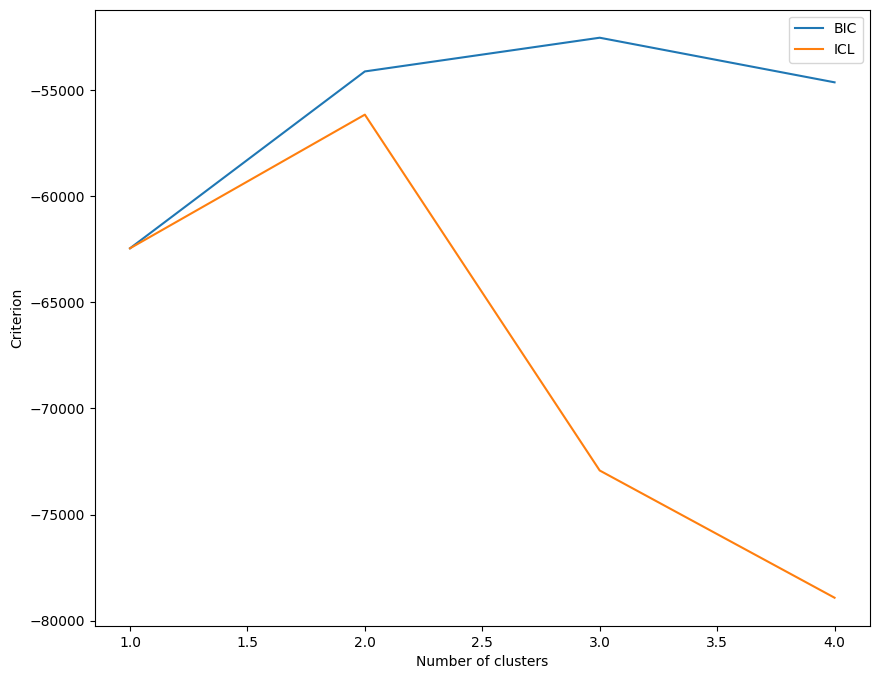

In [9]:
sns.lineplot(x=bic.keys(), y=bic.values(), label="BIC")
sns.lineplot(x=icl.keys(), y=icl.values(), label="ICL")
plt.xlabel("Number of clusters")
plt.ylabel("Criterion")
plt.show()

Choose the number of classes to study in the following.

In [10]:
k = 3

### Variables

Draw the discriminating level of each variable. A high value (close to one) means that the variable is highly discriminating. A low value (close to zero) means that the variable is poorly discriminating.

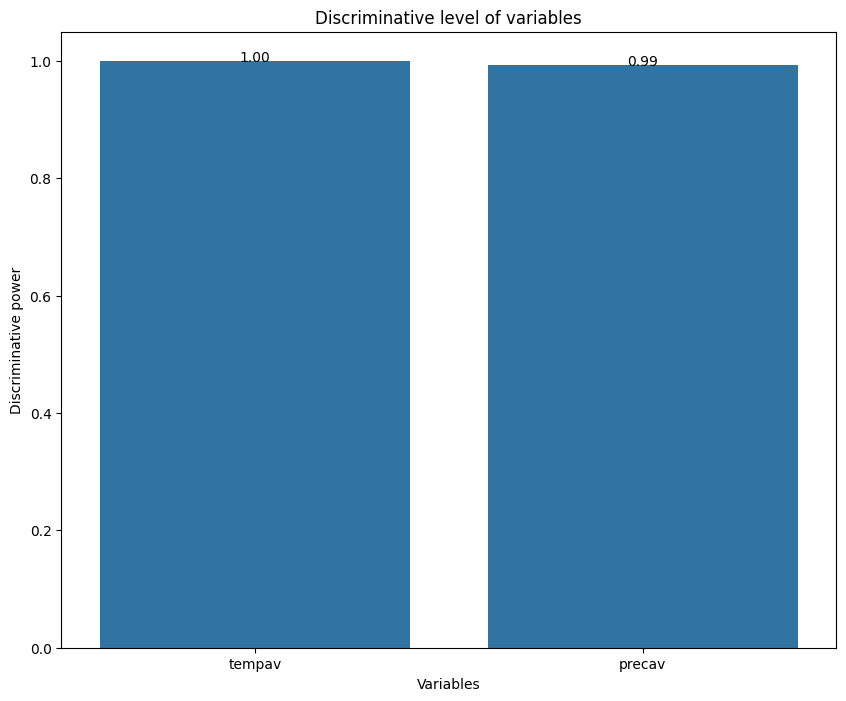

In [11]:
mod[k].plot_discriminative_power_variable()
plt.show()

Draw the similarity between every pair of variable. A high value (close to one) means that the two variables provide the same information for the clustering task (i.e. similar partitions). A low value (close to zero) means that the two variables provide some different information for the clustering task (i.e. different partitions).

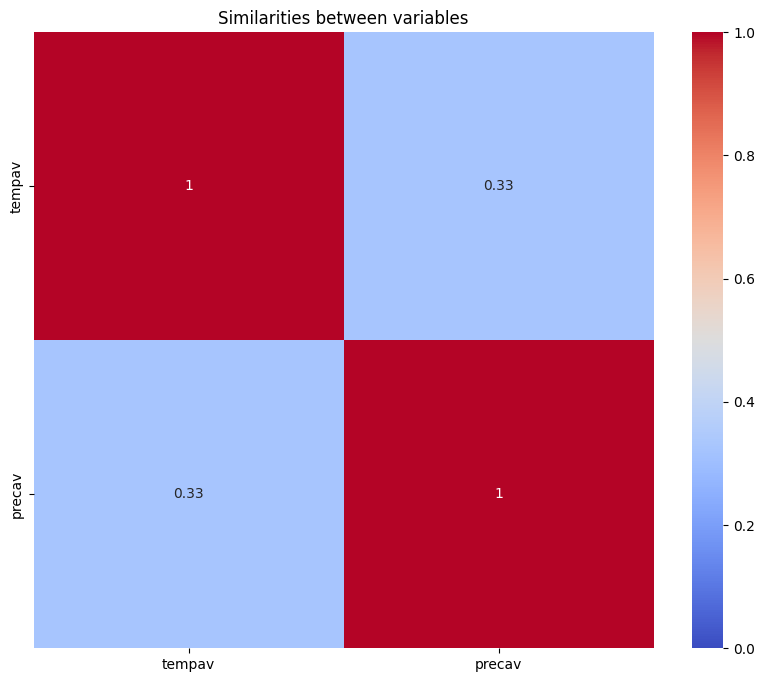

In [12]:
mod[k].plot_variable_similarity()
plt.show()

Select a variable to draw its distribution.

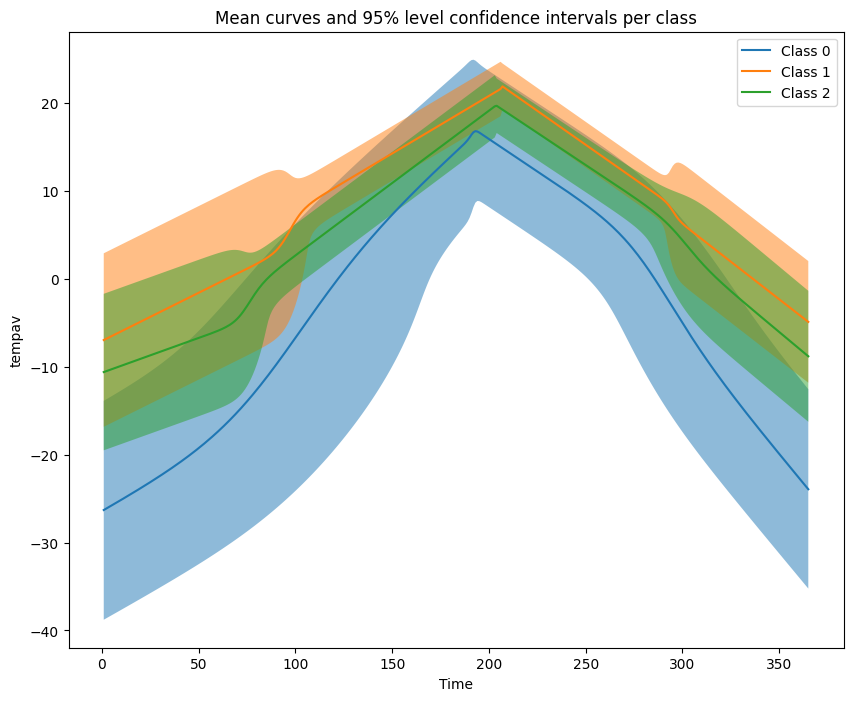

In [13]:
mod[k].plot_data("tempav")
plt.show()

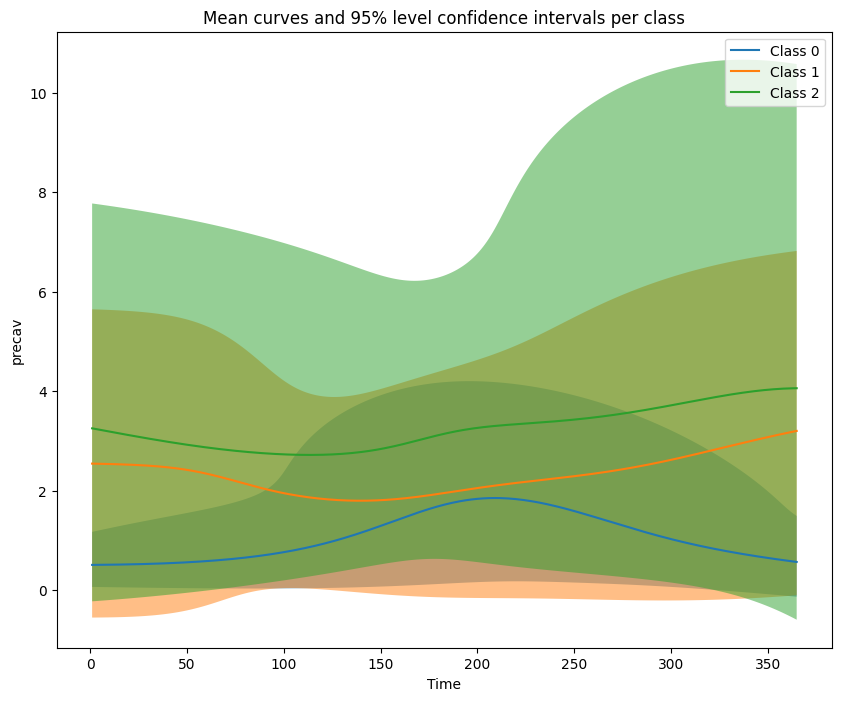

In [14]:
mod[k].plot_data("precav")
plt.show()

### Classes

Draw the proportion of individuals in each class.

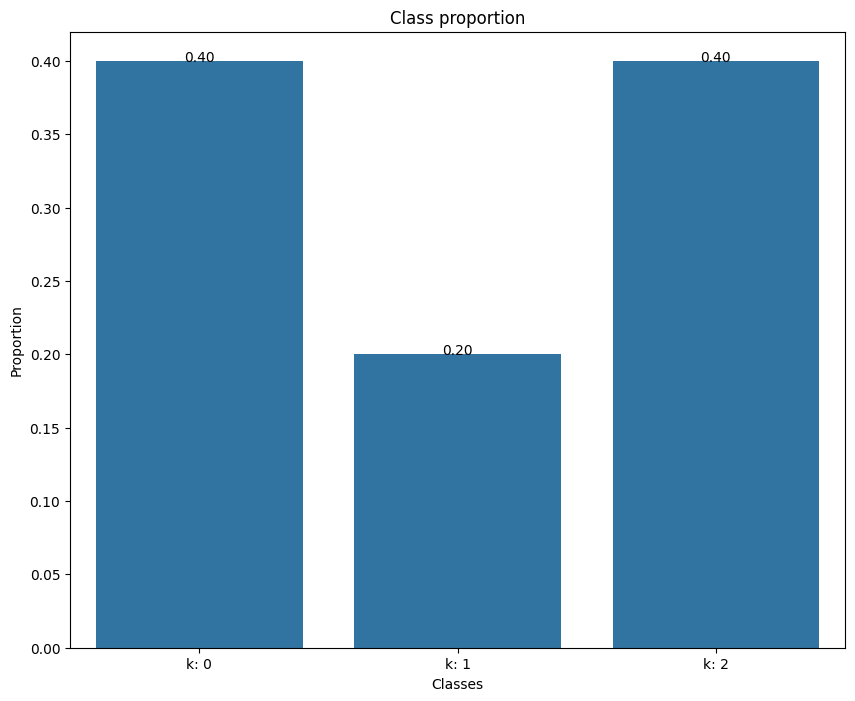

In [15]:
mod[k].plot_proportion()
plt.show()

Draw the similarity level between each pair of classes. A high value (close to one) means that the 2 classes are strongly different (i.e. low overlapping). A low value (close to zero) means that the 2 classes are similar for the clustering task (i.e. high overlapping).

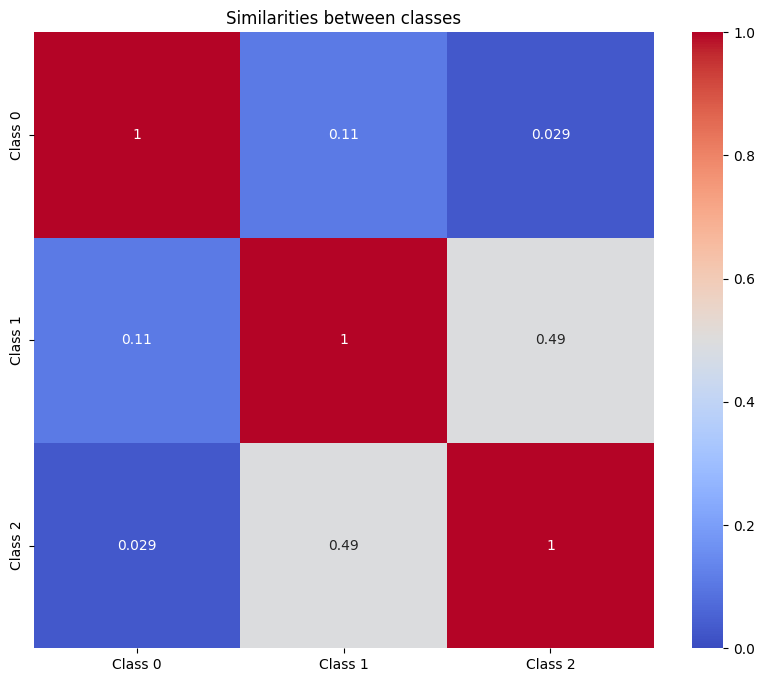

In [16]:
mod[k].plot_class_similarity()
plt.show()

Select a variable to draw its distribution for the selected class.

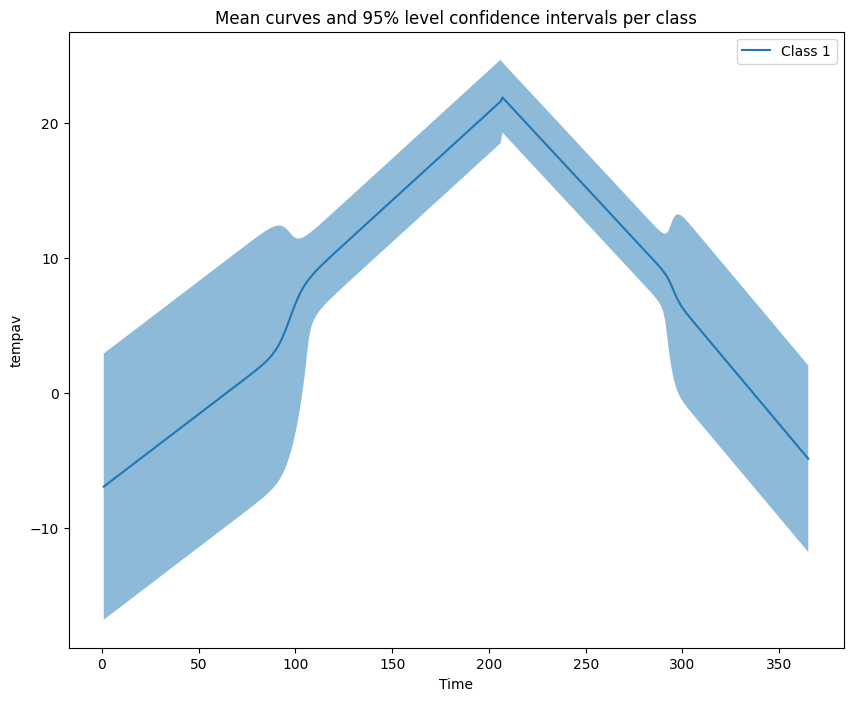

In [17]:
mod[k].plot_data("tempav", class_ids=1)
plt.show()

# Probabilities

This chart shows the probability of assignment to a class for each individual. Individuals have been reordered in decreasing assignment probability.

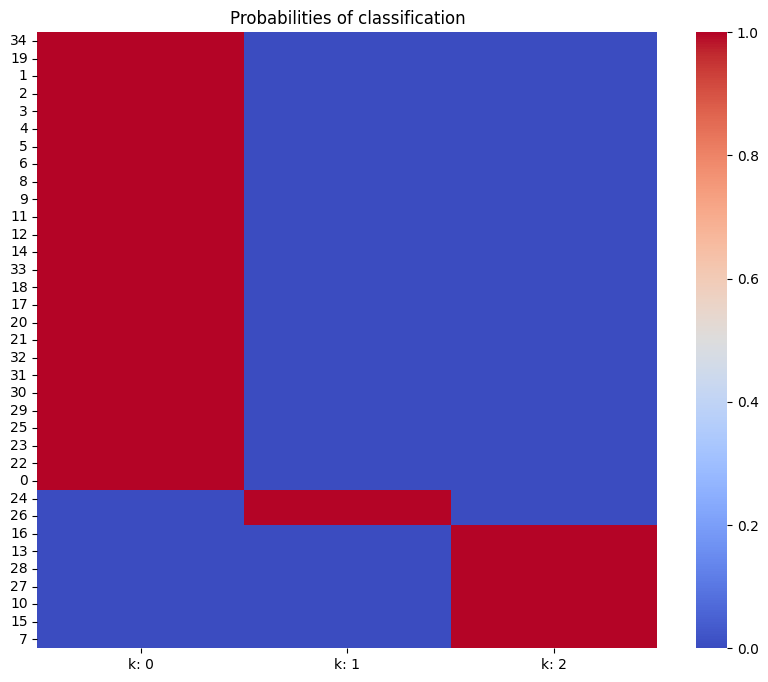

In [18]:
mod[k].plot_tik()
plt.show()